# AFSA Personal Insolvencies

First: You need to download the personal insolvency statistics from
the Australian Financial Security Authority (AFSA) website, 
and save them to the cache directory. 
***Note***: using CSV data format due to odd errors in the XLSX spreadsheets.



## Python set-up

In [1]:
# system imports
from pathlib import Path

In [2]:
# analytic imports
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# local imports
from plotting import line_plot, set_chart_dir, finalise_plot, state_abbr

In [4]:
# plotting set-up
TITLE = "Personal Insolvencies"
SOURCE = "Source: AFSA"
LFOOTER = "To do"
plt.style.use("fivethirtyeight")
CHART_DIR = "./CHARTS/AFSA/"
set_chart_dir(CHART_DIR)
for filename in Path(CHART_DIR).glob("*.png"):
    filename.unlink()
SHOW = True

## Get the data

In [5]:
AFSA_CACHE_DIR = "./AFSA_CACHE/"
Path(AFSA_CACHE_DIR).mkdir(parents=True, exist_ok=True)

In [6]:
## Use the CSV file to get the data - the XLSX files are unreliable

# data capture
MONTHLY = AFSA_CACHE_DIR + "Monthly_personal_insolvency_statistics_time_series.csv"
monthly = pd.read_csv(MONTHLY)

QUARTERLY = AFSA_CACHE_DIR + "quarterly_personal_insolvencies.csv"
quarterly = pd.read_csv(QUARTERLY)

## Plot national totals

In [7]:
wanted = ["Total bankruptcies", "Total personal insolvencies"]
situation = "Number of people entering a new personal insolvency"
key_column = "Type of personal insolvency administration"

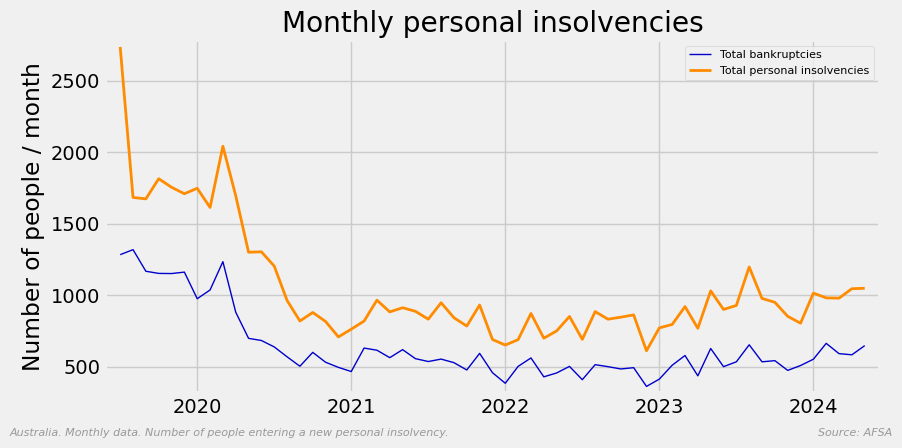

In [8]:
m = monthly.copy()
m = m[
    (m["State"] == "Australia")
    & (m["In a business or company"] == "Total")
    & (m["Industry of employment"] == "Total")
    & (m[key_column].isin(wanted))
]
m = m.pivot(index="Month", columns=key_column, values=situation)
m.index = [pd.Period("-20".join(x.split("-")), freq="M") for x in m.index]
m = m.sort_index()
line_plot(
    m[wanted],
    title="Monthly personal insolvencies",
    ylabel="Number of people / month",
    width=[1, 2],
    rfooter=SOURCE,
    lfooter=f"Australia. Monthly data. {situation}.",
    show=SHOW,
)

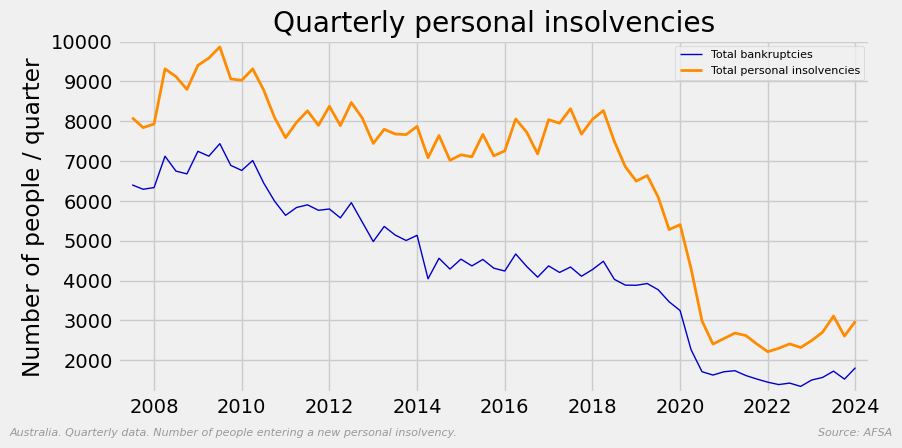

In [9]:
q = quarterly.copy()
q = q[
    (q["State"] == "Total")
    & (q["In a business or company"] == "Total")
    & (q[key_column].isin(wanted))
]
q = q.pivot(index="Quarter", columns=key_column, values=situation)
q.index = [pd.Period("-20".join(x.split("-")), freq="Q") for x in q.index]
q = q.sort_index()
line_plot(
    q[wanted],
    title="Quarterly personal insolvencies",
    ylabel="Number of people / quarter",
    rfooter=SOURCE,
    width=[1, 2],
    lfooter=f"Australia. Quarterly data. {situation}.",
    show=SHOW,
)

## Finished

In [10]:
# watermark
%load_ext watermark
%watermark -u -n -t -v -iv -w

Last updated: Tue Jul 16 2024 19:34:36

Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.26.0

pandas    : 2.2.2
matplotlib: 3.9.1

Watermark: 2.4.3



In [11]:
print("Done.")

Done.
